In [3]:
import shutil

# Directory to delete
dir_to_delete = '/kaggle/working/FSOCO-12'

# Delete the directory and its contents
try:
    shutil.rmtree(dir_to_delete)
    print(f"Deleted directory: {dir_to_delete}")
except OSError as e:
    print(f"Error: {dir_to_delete} - {e.strerror}")

Deleted directory: /kaggle/working/FSOCO-12


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BGaD8wyP0WnoeKS0jMnQ")
project = rf.workspace("fmdv").project("fsoco-kxq3s")
version = project.version(12)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.


Extracting Dataset Version Zip to FSOCO-12 in yolov8:: 100%|██████████| 19566/19566 [00:03<00:00, 5844.75it/s]


# **Data Analysis**

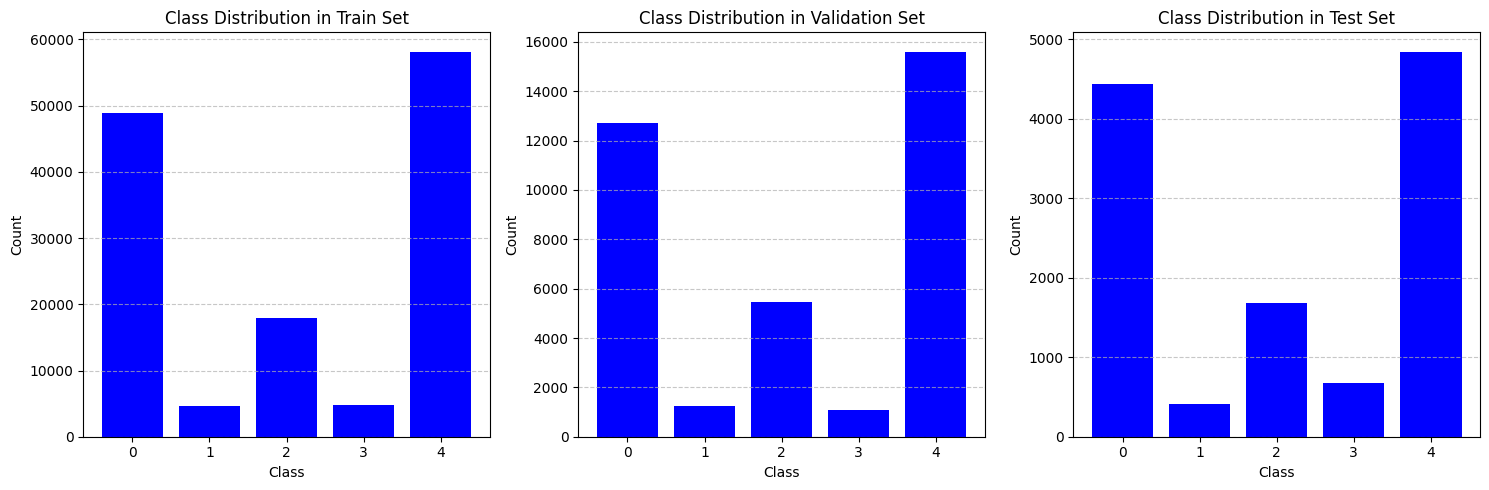

Number of train images: 7120
Number of train annotations: 134326
Average annotations per train image: 18.866

Number of validation images: 1968
Number of validation annotations: 36123
Average annotations per validation image: 18.355

Number of test images: 689
Number of test annotations: 12054
Average annotations per test image: 17.495


In [5]:
import os
from collections import Counter
import matplotlib.pyplot as plt

def count_files_in_directory(directory, extensions):
    return len([f for f in os.listdir(directory) if f.lower().endswith(extensions)])

def load_annotations_from_directory(labels_dir):
    annotations = []
    dir_contents = os.listdir(labels_dir)
    for txt_file in dir_contents:
        if txt_file.endswith('.txt'):
            file_path = os.path.join(labels_dir, txt_file)
            with open(file_path, 'r') as f:
                file_annotations = f.readlines()
                annotations.extend(file_annotations)
    
    return annotations

def calculate_average_annotations_per_image(annotations, num_images):
    if num_images > 0:
        avg_annotations_per_image = len(annotations) / num_images
        return f"{avg_annotations_per_image:.3f}"
    else:
        return "0.000"

def analyze_class_distribution(annotations):
    classes = [annotation.strip().split()[0] for annotation in annotations]
    class_counts = Counter(classes)
    return class_counts

# Define paths to the image and annotation directories
base_dir = '/kaggle/working/FSOCO-12'

train_images_dir = os.path.join(base_dir, 'train/images')
train_labels_dir = os.path.join(base_dir, 'train/labels')

valid_images_dir = os.path.join(base_dir, 'valid/images')
valid_labels_dir = os.path.join(base_dir, 'valid/labels')

test_images_dir = os.path.join(base_dir, 'test/images')
test_labels_dir = os.path.join(base_dir, 'test/labels')

# Count images
extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
num_train_images = count_files_in_directory(train_images_dir, extensions)
num_valid_images = count_files_in_directory(valid_images_dir, extensions)
num_test_images = count_files_in_directory(test_images_dir, extensions)

# Load annotations
train_annotations = load_annotations_from_directory(train_labels_dir)
valid_annotations = load_annotations_from_directory(valid_labels_dir)
test_annotations = load_annotations_from_directory(test_labels_dir)

# Count annotations
num_train_annotations = len(train_annotations)
num_valid_annotations = len(valid_annotations)
num_test_annotations = len(test_annotations)

# Calculate average annotations per image
avg_train_annotations_per_image = calculate_average_annotations_per_image(train_annotations, num_train_images)
avg_valid_annotations_per_image = calculate_average_annotations_per_image(valid_annotations, num_valid_images)
avg_test_annotations_per_image = calculate_average_annotations_per_image(test_annotations, num_test_images)

# Analyze class distribution
def sort_class_distribution(class_distribution):
    sorted_classes = sorted(class_distribution.items(), key=lambda item: int(item[0]))  # Sort by class index
    return {key: value for key, value in sorted_classes}

train_class_distribution = analyze_class_distribution(train_annotations)
valid_class_distribution = analyze_class_distribution(valid_annotations)
test_class_distribution = analyze_class_distribution(test_annotations)

# Sort class distributions
train_class_distribution = sort_class_distribution(train_class_distribution)
valid_class_distribution = sort_class_distribution(valid_class_distribution)
test_class_distribution = sort_class_distribution(test_class_distribution)

# Plot class distribution
def plot_class_distribution(class_distribution, dataset_name, ax):
    classes = list(class_distribution.keys())
    counts = list(class_distribution.values())

    ax.bar(classes, counts, color='blue')
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.set_title(f'Class Distribution in {dataset_name} Set')
    ax.set_xticks(classes)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create subplots for train, validation, and test set class distributions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

plot_class_distribution(train_class_distribution, 'Train', ax1)
plot_class_distribution(valid_class_distribution, 'Validation', ax2)
plot_class_distribution(test_class_distribution, 'Test', ax3)

plt.tight_layout()
plt.show()

# Print numerical results
print(f"Number of train images: {num_train_images}")
print(f"Number of train annotations: {num_train_annotations}")
print(f"Average annotations per train image: {avg_train_annotations_per_image}")
print()

print(f"Number of validation images: {num_valid_images}")
print(f"Number of validation annotations: {num_valid_annotations}")
print(f"Average annotations per validation image: {avg_valid_annotations_per_image}")
print()

print(f"Number of test images: {num_test_images}")
print(f"Number of test annotations: {num_test_annotations}")
print(f"Average annotations per test image: {avg_test_annotations_per_image}")

# **Random Image Visualization**

Random Image Path: /kaggle/working/FSOCO-12/test/images/mms_00206_jpg.rf.85b29c29d1f72473c2691e6c8fb70dec.jpg
Annotation: 4 0.09765625 0.6208333333333333 0.016015625 0.035416666666666666
4 0.372265625 0.5951388888888889 0.01796875 0.027777777777777776
4 0.62578125 0.6111111111111112 0.028125 0.03819444444444445
4 0.79921875 0.6909722222222222 0.04375 0.06319444444444444
0 0.39921875 0.7201388888888889 0.044921875 0.06736111111111111
0 0.348828125 0.65625 0.034765625 0.04722222222222222
0 0.16171875 0.6722222222222223 0.030859375 0.049305555555555554


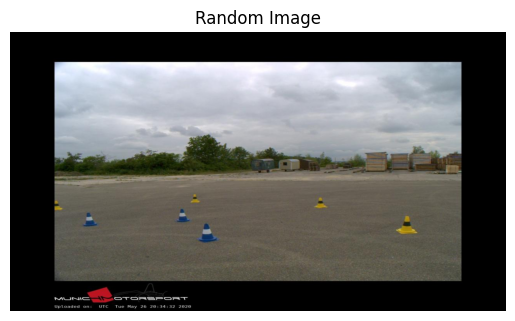

In [6]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_image_file = random.choice(os.listdir(test_images_dir))
image_path = os.path.join(test_images_dir, random_image_file)

# Find the corresponding annotation file
image_id = os.path.splitext(random_image_file)[0]  # Extract image id without extension
annotation_file = f"{image_id}.txt"
annotation_path = os.path.join(test_labels_dir, annotation_file)

# Read and print the annotation
with open(annotation_path, 'r') as f:
    annotation = f.read().strip()
    print(f"Random Image Path: {image_path}")
    print(f"Annotation: {annotation}")

# Display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis labels
plt.title('Random Image')
plt.show()

# **Random "Class 2" Image Visualization**

Random Image Path: /kaggle/working/FSOCO-12/train/images/ulm_00359_jpg.rf.a8f774fdcfbfa78e2419139cd6e1f314.jpg


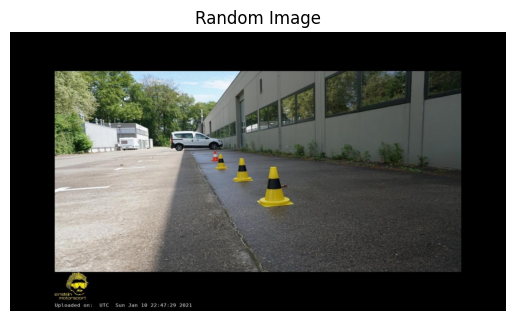

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_images_dir = '/kaggle/working/FSOCO-12/train/images'
train_labels_dir = '/kaggle/working/FSOCO-12/train/labels'

while True:
    # Select a random image
    random_image_file = random.choice(os.listdir(train_images_dir))
    image_path = os.path.join(train_images_dir, random_image_file)

    # Find the corresponding annotation file
    image_id = os.path.splitext(random_image_file)[0]  # Extract image id without extension
    annotation_file = f"{image_id}.txt"
    annotation_path = os.path.join(train_labels_dir, annotation_file)

    # Initialize a flag to check if class 2 is found in any line
    class_2_found = False

    # Read annotation file
    with open(annotation_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line:  # Check if line is not empty
                first_number = int(line.split()[0])  # Get the first number as an integer
                if first_number == 2:
                    class_2_found = True
                    print(f"Random Image Path: {image_path}")
                    break  # Exit the loop if a suitable image is found

    # Check if class 2 was found in any line
    if class_2_found:
        # Display the image
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axis labels
        plt.title('Random Image')
        plt.show()

        break  # Exit the while loop if a suitable image is found
    else:
        # Retry with another random image
        continue

In [8]:
!pip install imgaug
!pip install albumentations

# **Augmentation For "Class 2" (Small Orange)**

In [9]:
import imgaug.augmenters as iaa
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def augment_image(image_path, save_dir):
    # Load image
    img = mpimg.imread(image_path)
    
    # Define augmentation pipeline
    seq = iaa.Sequential([
        iaa.GaussianBlur(sigma=(0, 0.5)),  # gaussian blur
        iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # gaussian noise
        iaa.Multiply((0.8, 1.2), per_channel=0.2),  # brightness change
    ])
    
    # Augment image
    augmented_img = seq(image=img)
    
    # Create a unique save path with _AUG tag
    base_name = os.path.basename(image_path)
    name, ext = os.path.splitext(base_name)
    save_path = os.path.join(save_dir, f"{name}_AUG{ext}")
    
    # Save augmented image
    mpimg.imsave(save_path, augmented_img)
    
    return save_path

train_images_dir = '/kaggle/working/FSOCO-12/train/images'
train_labels_dir = '/kaggle/working/FSOCO-12/train/labels'
augmented_images_dir = '/kaggle/working/FSOCO-12/train/augmented_images'

# Ensure augmented images directory exists
os.makedirs(augmented_images_dir, exist_ok=True)

# Loop through all images in train directory
for image_file in os.listdir(train_images_dir):
    image_path = os.path.join(train_images_dir, image_file)

    # Find the corresponding annotation file
    image_id = os.path.splitext(image_file)[0]  # Extract image id without extension
    annotation_file = f"{image_id}.txt"
    annotation_path = os.path.join(train_labels_dir, annotation_file)

    # Check if annotation file exists and has class 2
    if os.path.exists(annotation_path):
        with open(annotation_path, 'r') as f:
            class_2_found = any(int(line.split()[0]) == 2 for line in f)

        if class_2_found:
            # Augment the image and save
            augmented_image_path = augment_image(image_path, augmented_images_dir)
#             print(f"Augmented Image Saved: {augmented_image_path}")

# Copy all augmented images back to the train images directory
for augmented_image_file in os.listdir(augmented_images_dir):
    src_path = os.path.join(augmented_images_dir, augmented_image_file)
    dst_path = os.path.join(train_images_dir, augmented_image_file)
    shutil.copy(src_path, dst_path)

print("Augmentation and copying complete.")

Augmentation and copying complete.


# **Augmentation For "Class 1" (Big Orange)**

In [10]:
import imgaug.augmenters as iaa
import os
import random
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def augment_image(image_path, save_dir):
    # Load image
    img = mpimg.imread(image_path)
    
    # Define augmentation pipeline
    seq = iaa.Sequential([
        iaa.GaussianBlur(sigma=(0, 0.5)),  # gaussian blur
        iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # gaussian noise
        iaa.Multiply((0.8, 1.2), per_channel=0.2),  # brightness change
    ])
    
    # Augment image
    augmented_img = seq(image=img)
    
    # Create a unique save path with _AUG tag
    base_name = os.path.basename(image_path)
    name, ext = os.path.splitext(base_name)
    save_path = os.path.join(save_dir, f"{name}_AUG{ext}")
    
    # Save augmented image
    mpimg.imsave(save_path, augmented_img)
    
    return save_path

train_images_dir = '/kaggle/working/FSOCO-12/train/images'
train_labels_dir = '/kaggle/working/FSOCO-12/train/labels'
augmented_images_dir = '/kaggle/working/FSOCO-12/train/augmented_images'

# Ensure augmented images directory exists
os.makedirs(augmented_images_dir, exist_ok=True)

# Find all images containing class 1
class_1_images = []
for image_file in os.listdir(train_images_dir):
    image_path = os.path.join(train_images_dir, image_file)
    
    # Find the corresponding annotation file
    image_id = os.path.splitext(image_file)[0]  # Extract image id without extension
    annotation_file = f"{image_id}.txt"
    annotation_path = os.path.join(train_labels_dir, annotation_file)
    
    # Check if annotation file exists and has class 1
    if os.path.exists(annotation_path):
        with open(annotation_path, 'r') as f:
            class_1_found = any(int(line.split()[0]) == 1 for line in f)
        
        if class_1_found:
            class_1_images.append(image_path)

# Select half of the class 1 images randomly
num_images_to_augment = len(class_1_images) // 2
images_to_augment = random.sample(class_1_images, num_images_to_augment)

# Augment the selected images
for image_path in images_to_augment:
    augmented_image_path = augment_image(image_path, augmented_images_dir)
#     print(f"Augmented Image Saved: {augmented_image_path}")

# Copy all augmented images back to the train images directory
for augmented_image_file in os.listdir(augmented_images_dir):
    src_path = os.path.join(augmented_images_dir, augmented_image_file)
    dst_path = os.path.join(train_images_dir, augmented_image_file)
    shutil.copy(src_path, dst_path)

print("Augmentation and copying complete.")

Augmentation and copying complete.


**Merge augmented images with original**

In [11]:
import shutil

# Copy all augmented images back to the train images directory
for augmented_image_file in os.listdir(augmented_images_dir):
    src_path = os.path.join(augmented_images_dir, augmented_image_file)
    dst_path = os.path.join(train_images_dir, augmented_image_file)
    shutil.copy(src_path, dst_path)

print("Copying of augmented images complete.")

Copying of augmented images complete.


In [12]:
import shutil

# Directory to delete
dir_to_delete = '/kaggle/working/FSOCO-12/train/augmented_images'

# Delete the directory and its contents
try:
    shutil.rmtree(dir_to_delete)
    print(f"Deleted directory: {dir_to_delete}")
except OSError as e:
    print(f"Error: {dir_to_delete} - {e.strerror}")

Deleted directory: /kaggle/working/FSOCO-12/train/augmented_images


# **Augment 20% of "Class 0 & 4"**

In [13]:
import imgaug.augmenters as iaa
import os
import random
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def augment_image(image_path):
    # Load image
    img = mpimg.imread(image_path)
    
    # Define augmentation pipeline
    seq = iaa.Sequential([
        iaa.GaussianBlur(sigma=(0, 0.5)),  # gaussian blur
        iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # gaussian noise
        iaa.Multiply((0.8, 1.2), per_channel=0.2),  # brightness change
    ])
    
    # Augment image
    augmented_img = seq(image=img)
    
    # Save augmented image
    mpimg.imsave(image_path, augmented_img)
    
    return image_path

train_images_dir = '/kaggle/working/FSOCO-12/train/images'
train_labels_dir = '/kaggle/working/FSOCO-12/train/labels'

# Ensure augmented images directory exists
augmented_images_dir = '/kaggle/working/FSOCO-12/train/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

# Find all images containing class 1
class_1_images = []
for image_file in os.listdir(train_images_dir):
    image_path = os.path.join(train_images_dir, image_file)
    
    # Find the corresponding annotation file
    image_id = os.path.splitext(image_file)[0]  # Extract image id without extension
    annotation_file = f"{image_id}.txt"
    annotation_path = os.path.join(train_labels_dir, annotation_file)
    
    # Check if annotation file exists and has class 1
    if os.path.exists(annotation_path):
        with open(annotation_path, 'r') as f:
            class_1_found = any(int(line.split()[0]) == 1 for line in f)
        
        if class_1_found:
            class_1_images.append(image_path)

# Select half of the class 1 images randomly
num_images_to_augment = len(class_1_images) // 2
images_to_augment = random.sample(class_1_images, num_images_to_augment)

# Augment the selected images
for image_path in images_to_augment:
    augmented_image_path = augment_image(image_path)
#     print(f"Augmented Image Saved: {augmented_image_path}")

# Augment images of class 0 and 4 and replace 20% of them
classes_to_augment = [0, 4]

for cls in classes_to_augment:
    class_images = []
    for image_file in os.listdir(train_images_dir):
        image_path = os.path.join(train_images_dir, image_file)

        # Find the corresponding annotation file
        image_id = os.path.splitext(image_file)[0]  # Extract image id without extension
        annotation_file = f"{image_id}.txt"
        annotation_path = os.path.join(train_labels_dir, annotation_file)

        # Check if annotation file exists and has the target class
        if os.path.exists(annotation_path):
            with open(annotation_path, 'r') as f:
                class_found = any(int(line.split()[0]) == cls for line in f)

            if class_found:
                class_images.append(image_path)

    # Select 20% of the class images randomly
    num_images_to_augment = len(class_images) // 5  # 20% of the images
    images_to_augment = random.sample(class_images, num_images_to_augment)

    # Augment the selected images and replace the originals
    for image_path in images_to_augment:
        augmented_image_path = augment_image(image_path)
#         print(f"Augmented Image Saved: {augmented_image_path}")

print("Augmentation and replacement complete.")

Augmentation and replacement complete.


# **Model**

In [14]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.5/8062.4 GB disk)


In [15]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 70.1MB/s]
Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100%|████████████████████████████████████████| 165k/165k [00:00<00:00, 5.06MB/s]
image 1/1 /kaggle/working/zidane.jpg: 384x640 2 persons, 1 tie, 117.0ms
Speed: 14.3ms preprocess, 117.0ms inference, 818.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [16]:
import yaml

yaml_path = '/kaggle/working/FSOCO-12/data.yaml'

# Load the YAML file
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Modify the paths in the YAML file
data['train'] = '/kaggle/working/FSOCO-12/train/images'
data['val'] = '/kaggle/working/FSOCO-12/valid/images'
data['test'] = '/kaggle/working/FSOCO-12/test/images'


# Save the modified YAML file
with open(yaml_path, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

# Verify changes
with open(yaml_path, 'r') as file:
    print(file.read())

names:
- blue_cone
- large_orange_cone
- orange_cone
- unknown_cone
- yellow_cone
nc: 5
roboflow:
  license: Public Domain
  project: fsoco-kxq3s
  url: https://universe.roboflow.com/fmdv/fsoco-kxq3s/dataset/12
  version: 12
  workspace: fmdv
test: /kaggle/working/FSOCO-12/test/images
train: /kaggle/working/FSOCO-12/train/images
val: /kaggle/working/FSOCO-12/valid/images



In [17]:
from ultralytics import YOLO
import os

# Define a function to save the model
def save_model(model, save_dir, epoch):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_path = os.path.join(save_dir, f'model_epoch_{epoch + 1}.pt')
    model.model.save(save_path)
    print(f'Model saved at: {save_path}')

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Directory to save the models
save_dir = '/kaggle/working/saved_models'

# Train the model manually to save after each epoch
for epoch in range(100):
    results = model.train(data='/kaggle/working/FSOCO-12/data.yaml', epochs=1, imgsz=640, resume=True)
    save_model(model, save_dir, epoch)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/FSOCO-12/data.yaml, epochs=500, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=8, project=YOLOv8, name=yolov8n, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=yolov8n.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=ultralytics/assets/, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 13.9MB/s]
2024-06-30 18:30:47,855	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-30 18:30:49,312	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


TensorBoard: Start with 'tensorboard --logdir YOLOv8/yolov8n', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2

train: Scanning /kaggle/working/FSOCO-12/train/labels... 7120 images, 3260 backgrounds, 0 corrupt: 100%|██████████| 10380/10380 [00:07<00:00, 1423.12it/s]


train: New cache created: /kaggle/working/FSOCO-12/train/labels.cache


train: Caching images (18.0GB Disk):  67%|██████▋   | 6997/10380 [01:00<00:29, 116.23it/s]


OSError: 2764800 requested and 1388416 written